#### Logistic Regression

a) **1st run statistics**
  - Weights chosen randomly from uniform distribution between -10 and 10.  
  - Learning rate = 0.1.
  - The algorithms runs at least 100 times, and will stop if the sum of the absolute value  of the gradient is very close to zero (less than 0.000001). The iterations is printed after the algorithm finishes running and is usually between 3,000 - 4,000 times.
  - Final weight vector (soln): [-1.82306627  0.56127303].  

b) See results of runs 2 - 4 below

c) See results of runs 5 -7 below

d) See results of run 1 below.  

e) Yes. My results from part a would classify Y = 1 when x > 3.25 and Y = 0 when x < 3.25.  

f) Yes, it would still make sense. We would have 3 students who did not complete any coursework in 3 weeks. 2 of which failed the class, and 1 of which who passed the class so the data is noiser. Thus, our solution will be different.  

Run 1
w = [-8.818855522230091, -0.6317130066147527], eta = 0.1
number of iterations = 4137
final weight vector (soln): [-1.82306622  0.56127302]
P(y = 1 | x = 3) = 0.4652443523192131
P(y = 1 | x = 5) = 0.7277622979563173


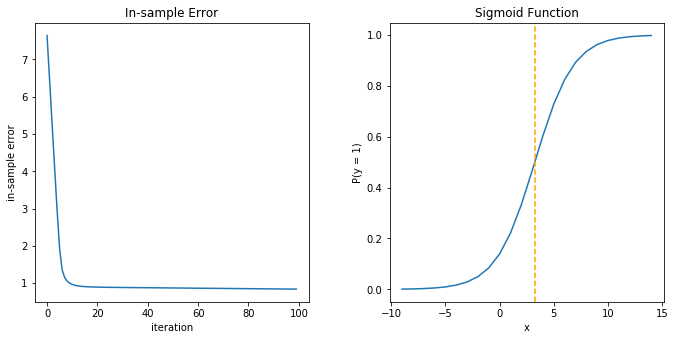

Run 2
w = [0, 0], eta = 0.1
number of iterations = 3255
final weight vector (soln): [-1.8230174   0.56126286]


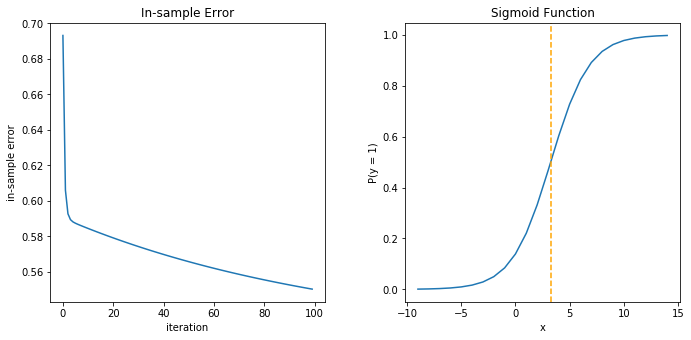

Run 3
w = [0, 0], eta = 0.5
number of iterations = 644
final weight vector (soln): [-1.82301781  0.56126294]


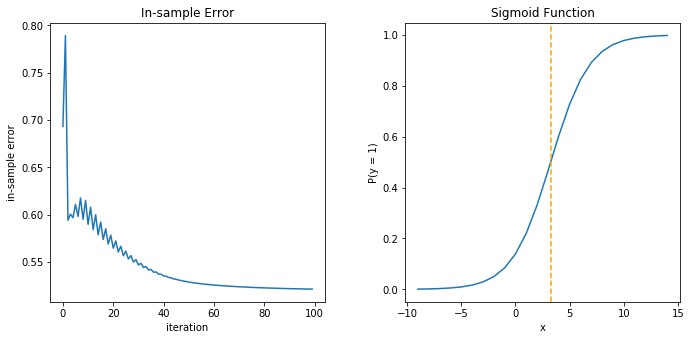

Run 4
w = [0, 0], eta = 0.8
final weight vector (soln): [-2.25387708  1.02467165]


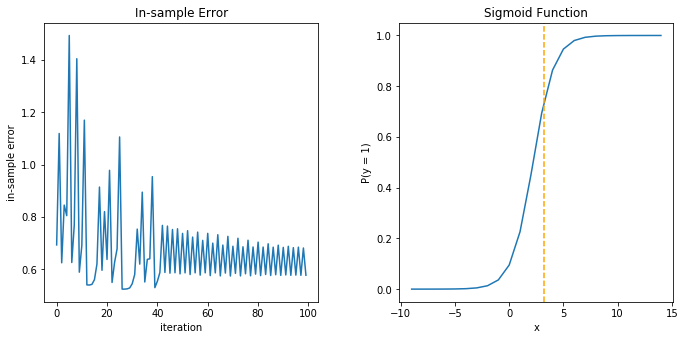

Run 5
w = [1.6019742752402988, 1.7754798207809932], eta = 0.1
number of iterations = 3375
final weight vector (soln): [-1.82301745  0.56126287]


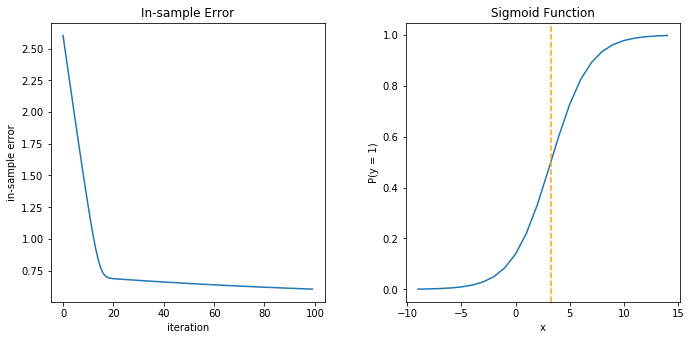

Run 6
w = [-3.7188752829644836, -1.0551919554863796], eta = 0.1
number of iterations = 3354
final weight vector (soln): [-1.82306627  0.56127303]


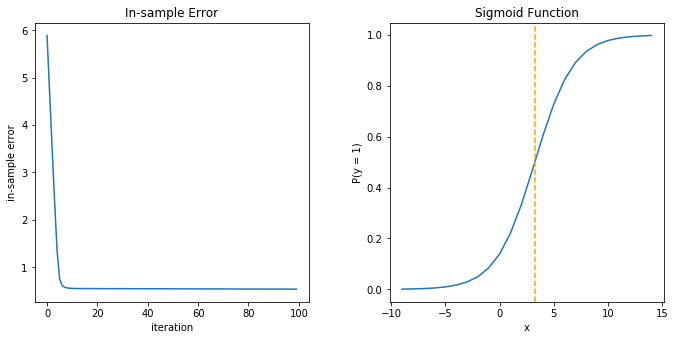

Run 7
w = [-2.394196098450861, 0.10484609160122282], eta = 0.1
number of iterations = 2940
final weight vector (soln): [-1.82306629  0.56127304]


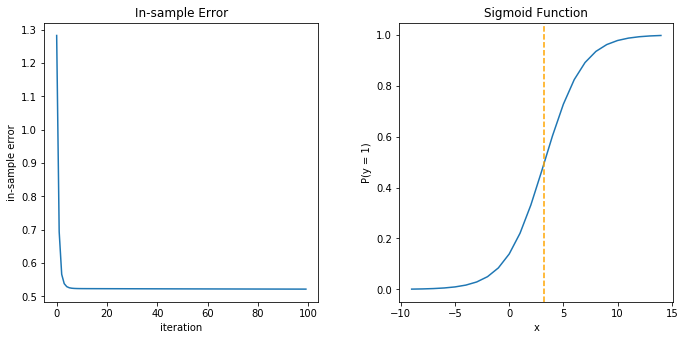

In [20]:
from math import e, pow, log
import numpy as np
import matplotlib.pyplot as plt


def main():
    x, y = get_x_y()

    min_iterations = 100
    t = 200000
    
    w_list = [
        np.random.uniform(-10, 10, x.shape[1]),
        
        # Experiment B: fixed weight initialization - varying learning rate
        [0, 0],
        [0, 0],
        [0, 0],
        
        # Experiment C: fixed learning rate - varying weight initialization
        np.random.uniform(-2, 2, x.shape[1]),
        np.random.uniform(-5, 5, x.shape[1]),
        np.random.uniform(-10, 10, x.shape[1])
    ]
    
    eta_list = [
        0.1,
        
        # Experiment B: fixed weight initialization - varying learning rate
        0.1,
        0.5,
        0.8,
        
        # Experiment C: fixed learning rate - varying weight initialization
        0.1,
        0.1,
        0.1
    ]
    
    run = 1
    
    for w, eta in zip(w_list, eta_list):
        print('Run {}'.format(run))
        print('w = [{}, {}], eta = {}'.format(w[0], w[1], eta))
        ein = []

        for i in range(t):
            if i < min_iterations:
                ein.append(insample_error(w, x, y))

            g = calculate_gradient(w, x, y)
            w = w - eta * g

            if np.sum(np.absolute(g)) < 0.000001 and i > min_iterations:
                print('number of iterations = {}'.format(i))
                break

        print('final weight vector (soln): {}'.format(w))
        
        if run == 1:
            p3 = logistic_fn(w, [1, 3])
            p5 = logistic_fn(w, [1, 5])
            print('P(y = 1 | x = 3) = {}'.format(p3))
            print('P(y = 1 | x = 5) = {}'.format(p5))
    
        plot_exp(ein, w)
        
        run += 1


def get_logistic_probs(w, x):
    probs = []
    for this_x in x:
        prob = logistic_fn(w, this_x)
        probs.append(prob)
    return probs


def get_predictions(w, x):
    preds = []
    for this_x in x:
        pred = round(logistic_fn(w, this_x))
        preds.append(pred)
    return [pred if pred > 0 else -1 for pred in preds]


def plot_exp(ein, w):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10.0, 5.0))
    f.canvas.set_window_title('Logistic Regression')
    plt.tight_layout(pad=3.0, w_pad=5.0, h_pad=4.0)

    # axes 1
    x_ein = np.array(range(0, len(ein)))
    ax1.set(title='In-sample Error',
            xlabel='iteration',
            ylabel='in-sample error',
            )
    ax1.plot(x_ein, ein)

    # axes 2
    midpoint = 3.25  # where P(x = 1) = 0.5
    x = range(round(midpoint) - 12, round(midpoint) + 12)
    probs = get_logistic_probs(w, add_bias(x))
    ax2.set(title='Sigmoid Function',
            xlabel='x',
            ylabel='P(y = 1)'
            )
    ax2.plot(x, probs)
    ax2.axvline(midpoint, color='orange', ls='--')
    plt.show()


def get_x_y():
    data = np.genfromtxt('../training_data.csv', delimiter=',', dtype='int32')
    x, y = data[:, 0], data[:, 1]
    return add_bias(x), [y if y == 1 else -1 for y in y]


def add_bias(x):
    return np.column_stack((np.ones_like(x), x))  # Let x0 equal 1


def calculate_gradient(w, x, y):
    gradient_sum = 0
    for this_x, this_y in zip(x, y):
        gradient_sum += partial_gradient(w, this_x, this_y)
    return - (gradient_sum / x.shape[0])


def partial_gradient(w, x, y):
    return (y * x) / (1 + pow(e, y * (np.dot(w, x))))


def logistic_fn(w, x):
    s = np.dot(w, x)
    return pow(e, s) / (1 + pow(e, s))


def insample_error(w, x, y):
    sum = 0
    for this_x, this_y in zip(x, y):
        sum += pt_error(w, this_x, this_y)
    return sum / x.shape[0]


def pt_error(w, x, y):
    return log(1 + pow(e, -y * np.dot(w, x)))


if __name__ == '__main__':
    main()
